In [1]:
import numpy as np
import mayavi.mlab as mlab
from vathos_utils.vision import vis_extrinsics
import matplotlib.pyplot as plt

# inspect their pointcloud
VIS = True
#file_path = "inference/2638_view_0.p"
file_path = "/home/sbreuers/vathos/s4g-release/tdgpd/datasets/bearring/train/scene_000.p"
single_training_data = np.load(file_path, allow_pickle=True)
print(single_training_data.keys())
print("point cloud")
print(single_training_data["point_cloud"].shape)
print(single_training_data["point_cloud"][:, 0:5])
print("search score")
print(single_training_data["search_score"].shape)
print(single_training_data["search_score"][0:5])
print("antipodal_score")
print(single_training_data["antipodal_score"].shape)
print(single_training_data["antipodal_score"][0:5])
print("valid_frame")
print(single_training_data["valid_frame"].shape)
print(single_training_data["valid_frame"][0, :, :])
print("valid_index")
print(single_training_data["valid_index"].shape)
print(single_training_data["valid_index"][0:5])
print("objects_label")
print(single_training_data["objects_label"].shape)
print(single_training_data["objects_label"][0:5])

if VIS:
    # visualize point cloud using mayavi
    mlab.figure(bgcolor=(0, 0, 0.1))
    mlab.points3d(
        single_training_data["point_cloud"][0, :],
        single_training_data["point_cloud"][1, :],
        single_training_data["point_cloud"][2, :],
        scale_factor=1,
        color=(1, 1, 1),
        mode="point",
    )

    #mlab.points3d(
    #    single_training_data["point_cloud"][0, single_training_data["objects_label"]],
    #    single_training_data["point_cloud"][1, single_training_data["objects_label"]],
    #    single_training_data["point_cloud"][2, single_training_data["objects_label"]],
    #    scale_factor=0.02,
    #    color=(1, 0, 0),
    #    mode="sphere",
    #)

    # create a color map using objects_label
    #cmap = plt.get_cmap("tab20")
    #colors = cmap(single_training_data["objects_label"] % 20)

    if True:
      mlab.points3d(
          single_training_data["point_cloud"][0, single_training_data["valid_index"]],
          single_training_data["point_cloud"][1, single_training_data["valid_index"]],
          single_training_data["point_cloud"][2, single_training_data["valid_index"]],
          single_training_data["objects_label"]+10,
          scale_factor=0.0005,
          colormap='Set1',
          mode="sphere",
      )
    if False:
      for frame in single_training_data["valid_frame"][:20,:,:]:
        #print(frame)
        vis_extrinsics(frame, scale=0.02)

    # line from each valid index to its corresponding frame
    mlab.quiver3d(
        single_training_data["point_cloud"][0, single_training_data["valid_index"]],
        single_training_data["point_cloud"][1, single_training_data["valid_index"]],
        single_training_data["point_cloud"][2, single_training_data["valid_index"]],
        single_training_data["valid_frame"][:, 0, 3] - single_training_data["point_cloud"][0, single_training_data["valid_index"]],
        single_training_data["valid_frame"][:, 1, 3] - single_training_data["point_cloud"][1, single_training_data["valid_index"]],
        single_training_data["valid_frame"][:, 2, 3] - single_training_data["point_cloud"][2, single_training_data["valid_index"]],
        scale_factor=1.0,
        color=(1, 1, 1),
        mode="arrow"
    )

    mlab.show()


dict_keys(['point_cloud', 'search_score', 'antipodal_score', 'valid_frame', 'valid_index', 'objects_label'])
point cloud
(3, 50000)
[[ 0.06647534 -0.07651136 -0.10128631  0.00639957 -0.06357951]
 [ 0.08744657  0.02604926  0.00187212 -0.06120267 -0.05705905]
 [ 0.18356389  0.20281629  0.21197481  0.2303293   0.23920624]]
search score
(251,)
[1000. 1000. 1000. 1000. 1000.]
antipodal_score
(251,)
[0.96610808 0.98909047 0.96443301 0.98895035 0.97379555]
valid_frame
(251, 4, 4)
[[-0.04592853  0.86301841  0.50308032 -0.0276317 ]
 [ 0.39484237 -0.44691891  0.80272228 -0.05319715]
 [ 0.9176002   0.23550527 -0.32022989  0.23366976]
 [ 0.          0.          0.          1.        ]]
valid_index
(251,)
[  98  224 1052 1069 1207]
objects_label
(251,)
[1 1 1 1 1]


In [ ]:
plt.hist(single_training_data["objects_label"], 50)
plt.show()
print(np.max(single_training_data["objects_label"]))
print(np.min(single_training_data["objects_label"]))

plt.plot(single_training_data["objects_label"])
plt.show()

plt.hist(single_training_data["antipodal_score"], 50)
plt.show()
print(np.max(single_training_data["antipodal_score"]))
print(np.min(single_training_data["antipodal_score"]))

In [ ]:
# VISUALIZE INFERENCE RESULTS
from vathos_utils.vision import read_ply_vertices, vis_extrinsics
import numpy as np
import mayavi.mlab as mlab
from matplotlib import pyplot as plt

mode = 'pred' # 'gt' or 'pred'
sub_dir = 'output_office_bearing/test_step00000'
#sub_dir = 'output_office_bearing/valid_step99801'
#sub_dir = 'valid_step45001'

pts = np.loadtxt(f'/home/sbreuers/vathos/s4g-release/tdgpd/datasets/{sub_dir}/scene_points.xyz')
scene_score = np.loadtxt(f'/home/sbreuers/vathos/s4g-release/tdgpd/datasets/{sub_dir}/{mode}_scene_score.txt')
frame_t = np.loadtxt(f"/home/sbreuers/vathos/s4g-release/tdgpd/datasets/{sub_dir}/{mode}_frame_t.txt")
frame_R = np.loadtxt(f"/home/sbreuers/vathos/s4g-release/tdgpd/datasets/{sub_dir}/{mode}_frame_R.txt")

frame = read_ply_vertices(f"/home/sbreuers/vathos/s4g-release/tdgpd/datasets/{sub_dir}/{mode}_frame.ply")

# sort scene_score
if mode == 'gt':
  scene_score = 1 / (1 + np.exp(-scene_score))
idx = np.argsort(scene_score)[::-1]
scene_score = scene_score[idx]
pts = pts[idx]

num_top_frames = 1
# set scene score to 0 for points that are not in top 20
#scene_score[num_top_frames:] = 0
top_frames = idx[:num_top_frames]
top_frame_t = frame_t[top_frames]
top_frame_R = frame_R[top_frames]


if True:
  mlab.figure(bgcolor=(0, 0, 0.1))
  if True:
    for t, R in zip(top_frame_t, top_frame_R):
      frame = np.eye(4)
      frame[:3, 3] = t
      frame[:3, :3] = np.reshape(R, (3,3))
      vis_extrinsics(frame, scale=0.02)

  if True:
    vis_points = mlab.points3d(
        pts[:, 0],
        pts[:, 1],
        pts[:, 2],
        scene_score,
        scale_mode='none',
        colormap='viridis',
        mode="point",
    )
    vis_points.actor.property.render_points_as_spheres =  True
    vis_points.actor.property.point_size = 5
    vis_points.actor.property.lighting = False
    mlab.show()

In [ ]:
# visualize those weird triangles (frames?)
import open3d as o3d
mesh = o3d.io.read_triangle_mesh(f"/home/sbreuers/vathos/s4g-release/tdgpd/datasets/{sub_dir}/{mode}_frame.ply")
vertices = np.asarray(mesh.vertices)
triangles = np.asarray(mesh.triangles)

x, y, z = vertices[:, 0], vertices[:, 1], vertices[:, 2]
mlab.figure(bgcolor=(1, 1, 1))
mesh_vis = mlab.triangular_mesh(
    x, y, z,
    triangles,
    representation='surface',
    opacity=1.0
)
mlab.show()


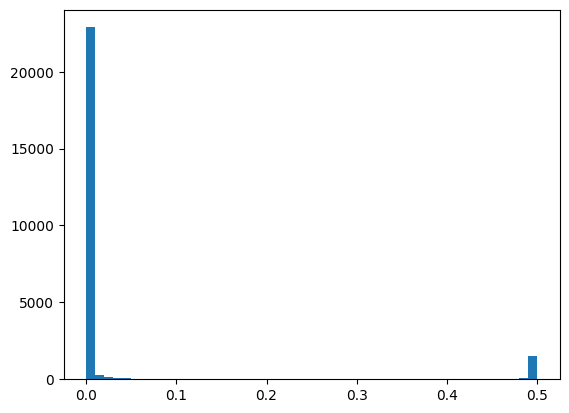

In [7]:
plt.hist(scene_score, 50)
plt.show()